In [2]:
import torch
import torchvision

from torchvision.datasets import FashionMNIST
from torch.utils.data import DataLoader
from torchvision import transforms

# define a transform to read the data in as a tensor
data_transform = transforms.ToTensor()

#choose the training and test datasets
train_data = FashionMNIST(root='./data', train=True,
                                   download=True, transform=data_transform)

# Print out some stats about the training data
print('Train data, number of images: ', len(train_data))

100%|█████████████████████████████████████████████████████████████████▉| 26402816/26421880 [00:37<00:00, 485889.51it/s]

Extracting ./data\FashionMNIST\raw\train-images-idx3-ubyte.gz



0it [00:00, ?it/s]
 56%|████████████████████████████████████████▌                                | 16384/29515 [00:00<00:00, 75692.91it/s]

Extracting ./data\FashionMNIST\raw\train-labels-idx1-ubyte.gz




0it [00:00, ?it/s]

  0%|                                                                                      | 0/4422102 [00:00<?, ?it/s]

  0%|▎                                                                      | 16384/4422102 [00:00<00:53, 82160.43it/s]

  1%|▊                                                                      | 49152/4422102 [00:01<00:45, 96582.44it/s]

  2%|█▋                                                                   | 106496/4422102 [00:01<00:35, 120499.68it/s]

  4%|██▉                                                                  | 188416/4422102 [00:01<00:26, 161866.71it/s]

  5%|███▌                                                                 | 229376/4422102 [00:01<00:22, 189194.19it/s]

  7%|████▉                                                                | 319488/4422102 [00:01<00:16, 246651.73it/s]

  9%|█████▉                                                               | 376832/4422102 [00:01<00:13, 297236.81it/s]

 10%|█████

Extracting ./data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz





0it [00:00, ?it/s]


8192it [00:00, 8886.25it/s]                                                                                            


Extracting ./data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz
Processing...
Done!
Train data, number of images:  60000



32768it [00:20, 75692.91it/s]                                                                                          

4423680it [00:19, 667121.83it/s]                                                                                       

Data iteration and batching

Next, we'll use torch.utils.data.DataLoader , which is an iterator that allows us to batch and shuffle the data.

In the next cell, we shuffle the data and load in image/label data in batches of size 20.


In [3]:
#prepare data loaders, set the batch_size
## TODO: you can try changing the batch_size to be larger or smaller
## when you get to training your network, see how batch_size affects the loss
batch_size = 20

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# specify the image classes
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

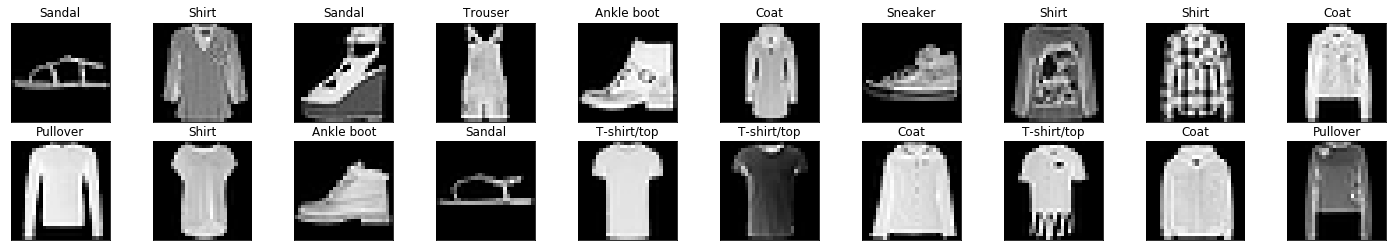

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

fig = plt.figure(figsize=(25,4))
for i in np.arange(batch_size):
    ax = fig.add_subplot(2,    batch_size/2, i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[i]), cmap='gray')
    ax.set_title(classes[labels[i]])

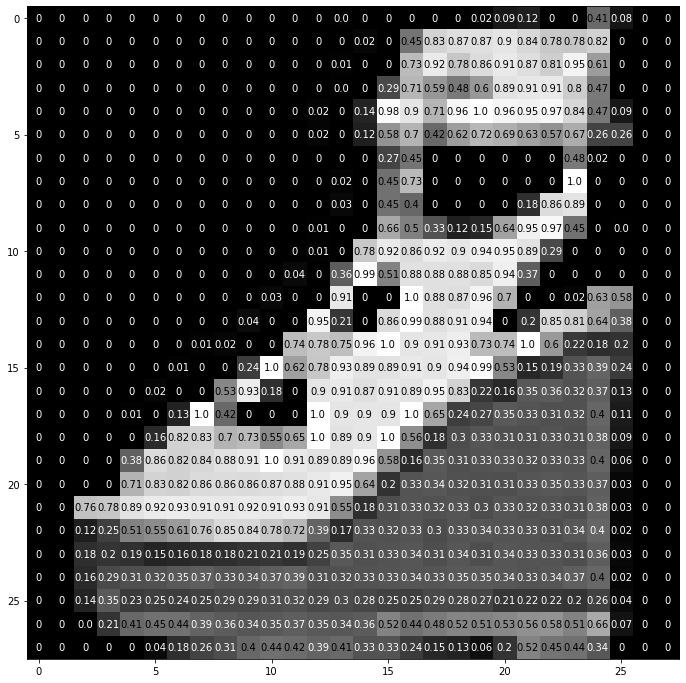

In [9]:
idx = 2
img = np.squeeze(images[idx])

# display the pixel values in that image
fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')